In [20]:
import convokit
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# load the corpus
corpus = convokit.Corpus(filename=convokit.download("reddit-corpus-small"))

Let's first take a look at some conversations from our corpus:

In [14]:
threads = corpus.utterance_threads(prefix_len=10)

def disp(thread, root, indent=0):
    print(" "*indent + thread[root].user.name + ": " +
        thread[root].text.replace("\n", " "))
    children = [k for k, v in thread.items() if v.reply_to == root]
    for child in children:
        disp(thread, child, indent=indent+4)

ids = list(sorted(threads.keys()))        
for root in ids[0], ids[50]:
    print("--- Thread {} (subreddit: {}) ---".format(root, corpus.utterances[root].user.info["subreddit"]))
    disp(threads[root], root)
    print()

--- Thread t1_4il8 (subreddit: books) ---
cfabbro: Depends entirely on what you like to read.  If you like sci-fi, then I'd suggest:  Brave New World  Nineteen Eighty Four  Fahrenheit 451  Welcome to the Monkey House: A Collection of Short Works  Dune  Snowcrash  Neuromancer  Do Androids Dream of Electric Sheep?  Stranger in a Strange Land
    LapsedPacifist: That's all great stuff.  I'd add The Scar or Iron Council by China Mieville, and Still Life with Woodpecker by Tom Robbins.
        [deleted-t1_4il8]: No Perdido Street Station?
            LapsedPacifist: Perdido Street is good too, I was just more blown away by the other two.
            tckearns: I have not read a more pretentious, GURPS-inspired chunk of garbage. My friend swears by Mieville, and I can't say anything about his earlier work, but Perdido is a flat-out failure.
        Lusy: Still Life with Woodpecker is my absolute favorite book. This is one everyone should read once.
            bOOkwurm: A Robbins great..but f

Use the HyperConvo module to extract some features from these conversations:

In [15]:
# create a hyperconvo object and use it to extract features
hc = convokit.HyperConvo(corpus)
threads_feats = hc.retrieve_feats()

/Users/andrew/Dev/research/convokit/convokit/hyperconvo.py:90: RuntimeWarning: invalid value encountered in long_scalars
  "norm.max": lambda l: np.max(l) / np.sum(l),
/Users/andrew/Dev/research/convokit/convokit/hyperconvo.py:95: RuntimeWarning: invalid value encountered in long_scalars
  if len(l) > 1 else np.nan,
/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2492: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / sum(pk, axis=0)
/Users/andrew/Dev/research/convokit/convokit/hyperconvo.py:102: RuntimeWarning: invalid value encountered in long_scalars
  if len(l) > 1 else np.nan


Here are the features we extract:

In [26]:
list(sorted([k for k in threads_feats["t1_4il8"].keys() if k[:5] not in ["count", "is-pr"]]))    # degree features

['2nd-argmax[indegree over C->C mid-thread responses]',
 '2nd-argmax[indegree over C->C responses]',
 '2nd-argmax[indegree over C->c mid-thread responses]',
 '2nd-argmax[indegree over C->c responses]',
 '2nd-argmax[indegree over c->c mid-thread responses]',
 '2nd-argmax[indegree over c->c responses]',
 '2nd-argmax[outdegree over C->C mid-thread responses]',
 '2nd-argmax[outdegree over C->C responses]',
 '2nd-argmax[outdegree over C->c mid-thread responses]',
 '2nd-argmax[outdegree over C->c responses]',
 '2nd-argmax[outdegree over c->c mid-thread responses]',
 '2nd-argmax[outdegree over c->c responses]',
 '2nd-largest / max[indegree over C->C mid-thread responses]',
 '2nd-largest / max[indegree over C->C responses]',
 '2nd-largest / max[indegree over C->c mid-thread responses]',
 '2nd-largest / max[indegree over C->c responses]',
 '2nd-largest / max[indegree over c->c mid-thread responses]',
 '2nd-largest / max[indegree over c->c responses]',
 '2nd-largest / max[outdegree over C->C mid

In [27]:
list(sorted([k for k in threads_feats["t1_4il8"].keys() if k[:5] in ["count", "is-pr"]]))    # motif features

['count[dyadic interaction motif over mid-thread]',
 'count[dyadic interaction motif]',
 'count[external reciprocity motif over mid-thread]',
 'count[external reciprocity motif]',
 'count[incoming triads over mid-thread]',
 'count[incoming triads]',
 'count[outgoing triads over mid-thread]',
 'count[outgoing triads]',
 'count[reciprocity motif over mid-thread]',
 'count[reciprocity motif]',
 'is-present[dyadic interaction motif over mid-thread]',
 'is-present[dyadic interaction motif]',
 'is-present[external reciprocity motif over mid-thread]',
 'is-present[external reciprocity motif]',
 'is-present[incoming triads over mid-thread]',
 'is-present[incoming triads]',
 'is-present[outgoing triads over mid-thread]',
 'is-present[outgoing triads]',
 'is-present[reciprocity motif over mid-thread]',
 'is-present[reciprocity motif]']

After retrieving features, we can perform dimensionality reduction to understand the main themes behind them:

In [28]:
X_threads, roots, components = hc.embed_threads(threads_feats, return_components=True)
X_communities, subreddits = hc.embed_communities(threads_feats, "subreddit")
feat_names = list(sorted(threads_feats[list(threads_feats.keys())[0]].keys()))

In [29]:
print("TOP THREADS")
for d in range(7):
    print("dimension {}".format(d))
    print("- most-negative threads")
    ranked = list(sorted(zip(roots, X_threads), key=lambda x: x[1][d]))
    for label, x in ranked[:10]:
        print("\t{}  {:.4f}".format(label, x[d]))
    print("- most-positive threads")
    for label, x in reversed(ranked[-10:]):
        print("\t{}  {:.4f}".format(label, x[d]))
    print()
    print()

TOP THREADS
dimension 0
- most-negative threads
	t1_c30ek0w  -0.0223
	t1_c7d3w9e  -0.0223
	t1_c33oicm  -0.0223
	t1_c31k38l  -0.0223
	t1_c2m5pmf  -0.0223
	t1_c31a582  -0.0223
	t1_c38ggtm  -0.0223
	t1_c3474ha  -0.0223
	t1_c3470s4  -0.0223
	t1_c31207f  -0.0223
- most-positive threads
	t1_c39ynlk  0.0332
	t1_c3b9eft  0.0332
	t1_c31aew9  0.0332
	t1_c2zve95  0.0332
	t1_c330bqp  0.0332
	t1_ccvhq9m  0.0332
	t1_ccvhucd  0.0332
	t1_ccvcmme  0.0332
	t1_ccvckbq  0.0332
	t1_ccva5xn  0.0332


dimension 1
- most-negative threads
	t1_c32pf3z  -0.0294
	t1_c336n8a  -0.0283
	t1_c336i37  -0.0243
	t1_c336iva  -0.0242
	t1_c33grel  -0.0239
	t1_c3g7kig  -0.0236
	t1_c32kug5  -0.0231
	t1_c2yfhrl  -0.0230
	t1_c2yzhte  -0.0224
	t1_c33c3g3  -0.0224
- most-positive threads
	t1_c02yjth  0.0488
	t1_c339ldj  0.0474
	t1_c31w0i2  0.0474
	t1_c30y0qw  0.0474
	t1_c39ynlk  0.0473
	t1_c3b9eft  0.0473
	t1_c31aew9  0.0473
	t1_c2zve95  0.0473
	t1_c330bqp  0.0473
	t1_ccvhq9m  0.0473


dimension 2
- most-negative threads
	t1_c32z

Some of these dimensions are readily interpretable. For example, dimension 0 corresponds to whether the conversation is flat and involving many people (all comments respond to the original commenter) or totally linear and involving few people (in our case most strongly expressed in the case of linear chains of deleted comments). Use this thread display tool to see what's going on in each dimension:

In [37]:
while True:
    print("Enter thread ID [t1_XXX]: ", end="")
    root = input()
    print("--- {} ---".format(root))
    disp(threads[root], root)
    print()

Enter thread ID [t1_XXX]: 

KeyboardInterrupt: 

We can also show the subreddits on each side of each dimension to get a further sense of what each dimension captures:

In [38]:
print("TOP SUBREDDITS")
for d in range(7):
    print("dimension {}".format(d))
    print("- most-negative subreddits")
    ranked = list(sorted(zip(subreddits, X_communities), key=lambda x: x[1][d]))
    for label, x in ranked[:10]:
        print("\t{}  {:.4f}".format(label, x[d]))
    print("- most-positive subreddits")
    for label, x in reversed(ranked[-10:]):
        print("\t{}  {:.4f}".format(label, x[d]))
    print()
    print()

TOP SUBREDDITS
dimension 0
- most-negative subreddits
	pokemontrades  -0.4981
	Random_Acts_Of_Amazon  -0.4975
	SteamGameSwap  -0.4209
	techsupport  -0.3806
	POLITIC  -0.3728
	MLPLounge  -0.3715
	electronic_cigarette  -0.3270
	Dota2Trade  -0.3225
	tf2trade  -0.3154
	teenagers  -0.3115
- most-positive subreddits
	AskReddit  0.2976
	gifs  0.2763
	WTF  0.2662
	aww  0.2618
	pics  0.2618
	movies  0.2352
	todayilearned  0.2208
	books  0.2107
	gaming  0.2105
	science  0.1980


dimension 1
- most-negative subreddits
	IAmA  -0.1966
	tf2  -0.1707
	programming  -0.1593
	CFB  -0.1555
	Bitcoin  -0.1394
	starcraft  -0.1381
	asoiaf  -0.1197
	news  -0.1172
	battlefield3  -0.1160
	anime  -0.1150
- most-positive subreddits
	friendsafari  0.2850
	pokemontrades  0.2455
	Random_Acts_Of_Amazon  0.2372
	SteamGameSwap  0.1912
	gonewild  0.1227
	malefashionadvice  0.1169
	MLPLounge  0.1112
	books  0.1080
	POLITIC  0.0989
	techsupport  0.0657


dimension 2
- most-negative subreddits
	nfl  -0.1691
	CFB  -0.1647
	

And we can show the features that are most represented in each dimension:

In [39]:
print("TOP FEATURES")
for d in range(7):
    print("dimension {}".format(d))
    print("- most negative features")
    ranked = list(sorted(zip(feat_names, np.transpose(components)),
        key=lambda x: x[1][d]))
    for label, x in ranked[:10]:
        print("\t{}  {:.4f}".format(label, x[d]))
    print("- most positive features")
    for label, x in reversed(ranked[-10:]):
        print("\t{}  {:.4f}".format(label, x[d]))
    print()
    print()

TOP FEATURES
dimension 0
- most negative features
	prop-nonzero[indegree over C->c mid-thread responses]  -0.1418
	prop-nonzero[indegree over c->c mid-thread responses]  -0.1418
	prop-nonzero[indegree over C->c responses]  -0.1418
	prop-nonzero[indegree over c->c responses]  -0.1418
	entropy[indegree over C->c responses]  -0.1402
	entropy[indegree over c->c responses]  -0.1402
	entropy[indegree over C->c mid-thread responses]  -0.1378
	entropy[indegree over c->c mid-thread responses]  -0.1378
	prop-nonzero[indegree over C->C mid-thread responses]  -0.1362
	prop-nonzero[indegree over C->C responses]  -0.1330
- most positive features
	entropy[outdegree over C->C responses]  0.1327
	entropy[outdegree over C->c responses]  0.1297
	norm.max[indegree over c->c responses]  0.1259
	norm.max[indegree over C->c responses]  0.1259
	max[indegree over c->c responses]  0.1259
	max[indegree over C->c responses]  0.1259
	count[incoming triads]  0.1244
	mean-nonzero[indegree over c->c responses]  0.121

Finally, we can use low-dimensional embeddings to visualize the space of subreddits:

In [50]:
# embed threads into a low-dimensional space and group them into communities
pts, labels = hc.embed_communities(threads_feats, "subreddit", n_intermediate_components=50, method="tsne")

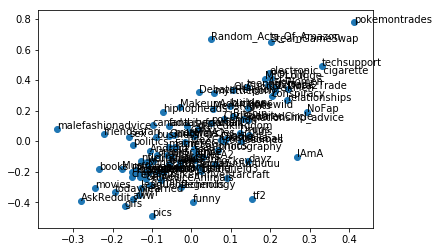

In [51]:
# plot
xs, ys = zip(*pts)
plt.scatter(xs, ys)
for i, txt in enumerate(labels):
    plt.annotate(txt, (xs[i], ys[i]))
plt.show()

We can see some intuitive groupings:

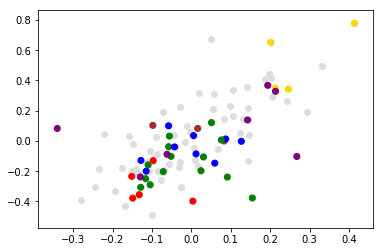

In [78]:
games = ["battlefield3", "Diablo", "DotA2", "Games", "gaming", "Guildwars2", "leagueoflegends", "magicTCG", "Minecraft", "pokemon", "skyrim", "starcraft", "tf2", "wow"]
sports = ["baseball", "CFB", "fantasyfootball", "Fitness", "hockey", "MMA", "nba", "nfl", "soccer"]
trade = ["Dota2Trade", "pokemontrades", "SteamGameSwap", "tf2trade"]
places = ["australia", "canada", "unitedkingdom"]
ask = ["explainlikeimfive", "AskMen", "askscience", "AskWomen", "IAmA", "malefashionadvice", "relationship_advice"]
reaction = ["aww", "cringe", "cringepics", "funny", "wow", "WTF"]

xs, ys = zip(*pts)
plt.scatter(xs, ys, color="#dddddd")
plt.scatter(xs, ys, color=[
    "green" if l in games else
    "blue" if l in sports else
    "gold" if l in trade else
    "brown" if l in places else
    "purple" if l in ask else
    "red" if l in reaction else
    "#00000000"
    for l in labels])
plt.show()